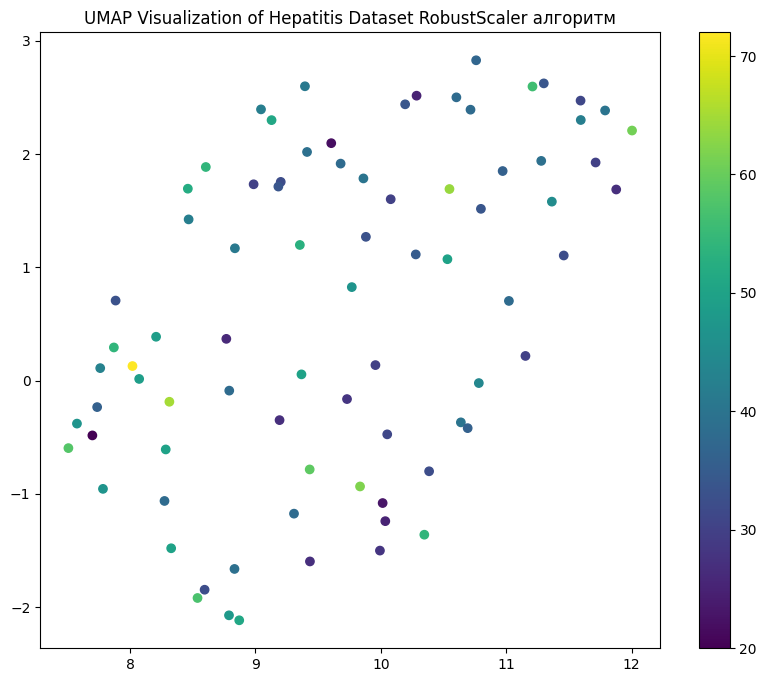

In [2]:
from sklearn.preprocessing import RobustScaler
import pandas as pd
import sns
import umap
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
# Загрузка данных
data = pd.read_csv('hepatitis.csv')
data = data.dropna()
numeric_features = data.select_dtypes(include=[np.number])
# Удаление столбца с целевой переменной (для визуализации)

scaler = RobustScaler()
scaled_data = scaler.fit_transform(numeric_features.drop(['age'], axis=1))

# Выполнение UMAP

reducer = umap.UMAP()
umap_data = reducer.fit_transform(scaled_data)

# Создание датафрейма для визуализации и добавление меток классов
umap_df = pd.DataFrame(umap_data, columns=['UMAP 1', 'UMAP 2'])
umap_df['age'] = data['age']


plt.figure(figsize=(10, 8))
plt.scatter(umap_data[:, 0], umap_data[:, 1], c=data['age'], cmap='viridis')
#sns.scatterplot(data=umap_df, x='UMAP 1', y='UMAP 2', hue='age', palette='Set1')
plt.title('UMAP Visualization of Hepatitis Dataset RobustScaler алгоритм')
plt.colorbar()

plt.show()